In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf

2024-04-19 20:30:07.906481: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 20:30:09.325902: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Data Creadit - https://www.kaggle.com/code/devanshusingh/tensorflow-functional-api/input

<span style="font-size: 30px;">Importing png file for Digit Data Sets from Keras .</span>

In [2]:
data = pd.read_csv('/home/rahul/Mohit/Downloads/archive/train_label.csv')
data.head()

,image_path,label,x_mark,y_mark,width,height
0,0.png,5,23.0,0.0,51.0,28.0
1,1.png,0,43.0,34.0,71.0,62.0
2,2.png,4,43.0,23.0,71.0,51.0
3,3.png,1,3.0,27.0,31.0,55.0
4,4.png,9,32.0,12.0,60.0,40.0


In [3]:
col1 = data.image_path    #image_path column
col2 = data.label         #Label column
col3 = data[data.select_dtypes(include=['int64','float64']).columns[1:]] #x_mark, y_mark, width, height columns

Image=col1.values   #Have all image names 
Label=col2.values   # Have all actual number value of photo 
Coord=col3.values # Have all values of x_mark, y_mark, width and height

In [4]:
print(" Picture name :", Image[0], '\n' ,"Number written in picture :", Label[0])

 Picture name : 0.png 
 Number written in picture : 5


<span style="font-size: 30px;">Reading png files.</span>

In [5]:
import cv2
path='/home/rahul/Mohit/Downloads/archive/train/'
x=[]
for i,Img in enumerate(Image):
    #Reading pictures and converting into numerical array
    a=cv2.imread(path+Img , cv2.IMREAD_UNCHANGED)
    x.append(a)

x=np.array(x)
print("Number of Photos, Horizontal Pixels, Vertical Pixels : " ,np.shape(x))

Number of Photos, Horizontal Pixels, Vertical Pixels :  (60000, 75, 75)


<span style="font-size: 30px;">Resizing Pixels of Pictures .</span>

In [6]:
# Define the new dimensions
PixelX=28
PixelY=28

# Create an empty list to store resized images
resized_images = []

# Iterate over each image in x and resize it
for img in x:
    resized_img = cv2.resize(img, (PixelX,PixelY))
    resized_images.append(resized_img)
    
# Convert the list of resized images to a numpy array
resized_x = np.array(resized_images)

# Print the shape of the resized array
print("Shape of resized x:", resized_x.shape)


Shape of resized x: (60000, 28, 28)


In [7]:
for row in resized_x[0]:
     print(row) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0   0   0   0   0   0   0   0  28 124 230 253 198 210  32
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0  31 126 225  38   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0 222   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0  41 243  53   0   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   4 253  18   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0  14 188 253 147   0   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0  34 204 253 171   4   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[ 0  0  0  0  0  0  0  0  0  0 11 13  7  0  0  0  0  0  0  0  0  0  0  0
  0  0

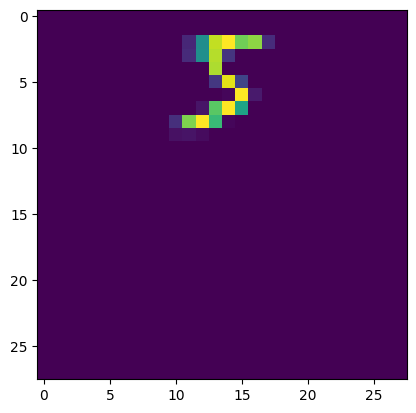

In [8]:
plt.imshow(resized_x[0])

In [9]:
# Depth = len(Image)
# PixelX=28
# PixelY=28
# #PixelX=75
# #PixelY=75
# ImageX = np.empty((Depth, PixelX, PixelY))
# path='/home/rahul/Mohit/Downloads/archive/train/'
# for i,Img in enumerate(Image):
#     # Load the image
#     ig = tf.io.read_file(path + Img)

#     # Decode the image
#     ig = tf.image.decode_image(ig, channels=1, dtype=tf.float32)

#     # Normalize the pixel values to the range [0, 1] , RGB color range from 0 to 255
#     #ig = tf.cast(ig, tf.float32) / 255.0

#     # Resize the image to a fixed size (e.g., 28x28 pixels)
#     ig = tf.image.resize(ig, (PixelX, PixelY))
    
#     #Reshape 3D array (28,28,1) to (1,28,28)
#     ig=np.reshape(ig,(1,PixelX,PixelY))
    
#     #Storing all Preprocessed imagaes in ImageX
#     ImageX[i]=ig

# np.shape(ImageX)


In [10]:
#print(ImageX[0])

In [11]:
#plt.imshow(ImageX[0])


In [12]:
# #Resizing Images for Convolution operation

# # ImageX=np.array(ImageX).reshape(Depth,PixelX,PixelY,1)
# # np.shape(ImageX[1:])

# from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(ImageX, Label, test_size=0.25)

# print(np.shape(X_train),np.shape(X_test))

In [13]:
#X_train=resized_x
#Y_train=Label
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(resized_x, Label, test_size=0.2)

PixelX=28
PixelY=28

In [14]:
# Define the neural network architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, Activation, MaxPooling2D
from tensorflow.keras.regularizers import l2

model = Sequential([

#Feature Extraction
    #First Layer 
    #Convolution layer have 64 kernels size of each 3x3
    Conv2D(64,(3,3), activation = 'relu', input_shape=(PixelX,PixelY,1)),  #Reduce pixel size form 28x28 to [(28-3)+1]x[(28-3)+1]=26x26
    MaxPooling2D(pool_size=(2,2)), # from 2x2 matrix chosse single max value out 4 values and reduce size (26/2)x(26/2)=13x13

    #Second Layer
    Conv2D(64,(3,3), activation = 'relu', input_shape=(PixelX,PixelY,1)),  #Reduce pixel size form 26x26 to [(13-3)+1]x[(13-3)+1]=11x11
    MaxPooling2D(pool_size=(2,2)), # from 2x2 matrix chosse single max value out 4 values  

    #Third Layer
    Conv2D(64,(3,3), activation ='relu', input_shape=(PixelX,PixelY,1)),  
    MaxPooling2D(pool_size=(2,2)), # from 2x2 matrix chosse single max value out 4 values
    
#Classification    
    Flatten(),  # Flatten the input images  
    Dense(units=64, activation='relu'), #kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(units=32, activation='relu'), #kernel_regularizer=l2(0.01)), 
    Dropout(0.5),  
    Dense(units=10, activation='softmax'),#kernel_regularizer=l2(0.01)),
])
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()
fitmod=model.fit(X_train, Y_train, epochs=15, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_train, Y_train)
print(f'Test accuracy: {test_acc}')

/home/rahul/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-19 20:30:21.113821: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.1449 - loss: 2.5881 - val_accuracy: 0.3970 - val_loss: 1.6618
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - accuracy: 0.3721 - loss: 1.6667 - val_accuracy: 0.5683 - val_loss: 1.1666
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - accuracy: 0.5180 - loss: 1.2959 - val_accuracy: 0.6570 - val_loss: 0.9299
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.5941 - loss: 1.0968 - val_accuracy: 0.6767 - val_loss: 0.9110
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.6536 - loss: 0.9733 - val_accuracy: 0.7362 - val_loss: 0.7457
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.6943 - loss: 0.8909 - val_accuracy: 0.7815 - val_loss: 0.6819
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 53s 44ms/step - accuracy: 0.7196 - loss: 0.8311 - val_accuracy: 0.7880 - val_loss: 0.6450
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.7424 -

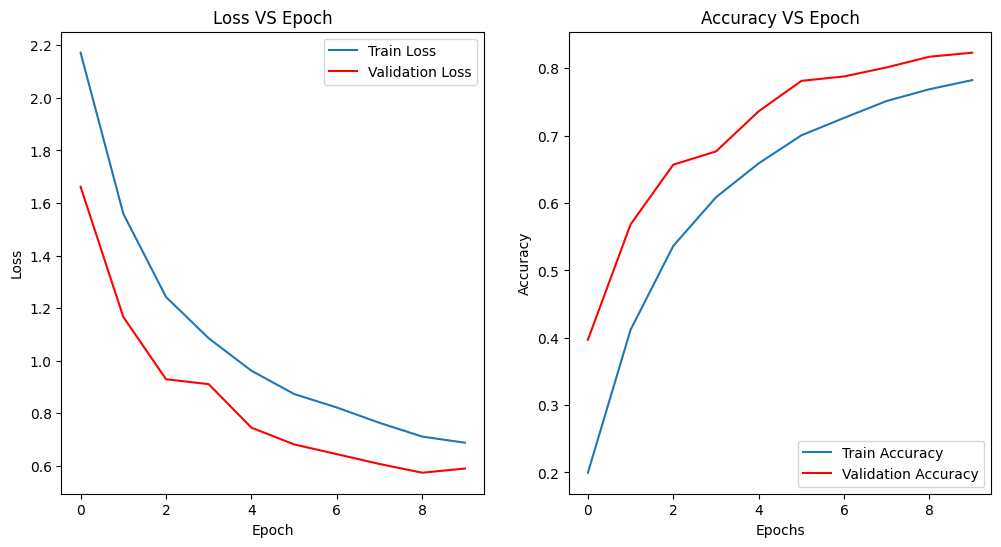

In [15]:
#import visualkeras
#visualkeras.layered_view(model, scale_xy=5, legend=True)

train_loss = fitmod.history['loss']
train_accuracy = fitmod.history['accuracy']
val_accuracy = fitmod.history['val_accuracy']
val_loss = fitmod.history['val_loss']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  #
axs[0].plot(train_loss)
axs[0].plot(val_loss,'r')
axs[0].set_title("Loss VS Epoch")
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train Loss', 'Validation Loss'], loc='upper right')


axs[1].plot(train_accuracy)
axs[1].plot(val_accuracy,'r')
axs[1].set_title("Accuracy VS Epoch")
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

In [16]:
Y_Pred=model.predict(X_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


In [17]:
Y_Pred=np.argmax(Y_Pred,axis=1)
#np.shape(Y_Pred)
Y_Pred

array([2, 6, 8, ..., 8, 3, 1])

In [18]:
Prediction=pd.DataFrame({'Actual Digit':Y_test,'Predicted Digit':Y_Pred,'Difference':Y_test-Y_Pred})
Prediction

,Actual Digit,Predicted Digit,Difference
0,2,2,0
1,6,6,0
2,8,8,0
3,3,3,0
4,1,1,0
...,...,...,...
11995,5,5,0
11996,3,3,0
11997,4,8,-4
11998,2,3,-1


<span style="font-size: 30px;">Importing Digit Data Sets from Keras MNIST.</span>

In [19]:
mnist=tf.keras.datasets.mnist
(X_train2, Y_train2),(X_test2,Y_test2)=mnist.load_data()

In [20]:
#print(X_train2[0])

In [21]:
#plt.imshow(X_train2[0])
np.shape(X_train2)

(60000, 28, 28)

In [22]:
PixelX=28
PixelY=28

In [23]:
# Define the neural network architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, Activation, MaxPooling2D
from tensorflow.keras.regularizers import l2

model2 = Sequential([

#Feature Extraction
    #First Layer 
    #Convolution layer have 64 kernels size of each 3x3
    Conv2D(64,(3,3), activation = 'relu', input_shape=(PixelX,PixelY,1)),  #Reduce pixel size form 28x28 to [(28-3)+1]x[(28-3)+1]=26x26
    MaxPooling2D(pool_size=(2,2)), # from 2x2 matrix chosse single max value out 4 values and reduce size (26/2)x(26/2)=13x13

    #Second Layer
    Conv2D(64,(3,3), activation = 'relu', input_shape=(PixelX,PixelY,1)),  #Reduce pixel size form 26x26 to [(13-3)+1]x[(13-3)+1]=11x11
    MaxPooling2D(pool_size=(2,2)), # from 2x2 matrix chosse single max value out 4 values  

    #Third Layer
    Conv2D(64,(3,3), activation ='relu', input_shape=(PixelX,PixelY,1)),  
    MaxPooling2D(pool_size=(2,2)), # from 2x2 matrix chosse single max value out 4 values
    
#Classification    
    Flatten(),  # Flatten the input images  
    Dense(units=64, activation='relu'), #kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(units=32, activation='relu'), #kernel_regularizer=l2(0.01)), 
    Dropout(0.5),  
    Dense(units=10, activation='softmax'),#kernel_regularizer=l2(0.01)),
])
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model2.summary()
fitmod2=model2.fit(X_train2, Y_train2, epochs=15, validation_split=0.2)

# Evaluate the model
test_loss2, test_acc2 = model2.evaluate(X_train2, Y_train2)
print(f'Test accuracy: {test_acc2}')

/home/rahul/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.3347 - loss: 2.2594 - val_accuracy: 0.7628 - val_loss: 0.7208
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.6639 - loss: 0.9144 - val_accuracy: 0.8522 - val_loss: 0.4617
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.7818 - loss: 0.6310 - val_accuracy: 0.8818 - val_loss: 0.3176
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.8303 - loss: 0.4696 - val_accuracy: 0.8798 - val_loss: 0.2952
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.8488 - loss: 0.3884 - val_accuracy: 0.8855 - val_loss: 0.2519
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.8712 - loss: 0.3547 - val_accuracy: 0.9711 - val_loss: 0.1604
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 34ms/step - accuracy: 0.9066 - loss: 0.2962 - val_accuracy: 0.9727 - val_loss: 0.1507
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9304 -

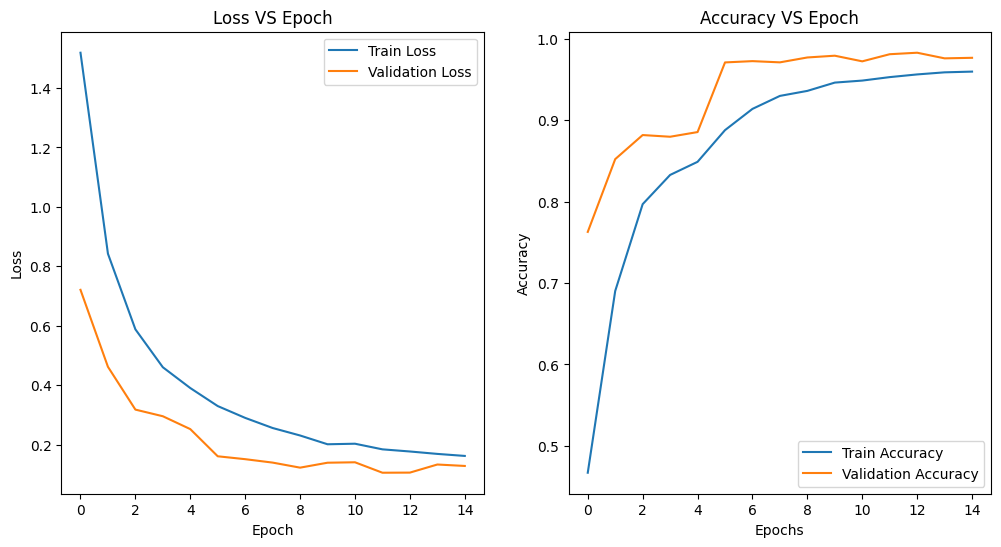

In [24]:
#import visualkeras
#visualkeras.layered_view(model, scale_xy=5, legend=True)

train_loss2 = fitmod2.history['loss']
train_accuracy2 = fitmod2.history['accuracy']
val_accuracy2 = fitmod2.history['val_accuracy']
val_loss2 = fitmod2.history['val_loss']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  #
axs[0].plot(train_loss2)
axs[0].plot(val_loss2)
axs[0].set_title("Loss VS Epoch")
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train Loss', 'Validation Loss'], loc='upper right')


axs[1].plot(train_accuracy2)
axs[1].plot(val_accuracy2)
axs[1].set_title("Accuracy VS Epoch")
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

In [25]:
np.shape(X_test2)

(10000, 28, 28)

In [26]:
Y_Pred2=model2.predict(X_test2)
Y_Pred2=np.argmax(Y_Pred2,axis=1)
#Y_Pred2

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [27]:
Prediction2=pd.DataFrame({'Actual Digit':Y_test2,'Predicted Digit':Y_Pred2,'Difference':Y_test2-Y_Pred2})
Prediction2

,Actual Digit,Predicted Digit,Difference
0,7,7,0
1,2,2,0
2,1,1,0
3,0,0,0
4,4,4,0
...,...,...,...
9995,2,2,0
9996,3,3,0
9997,4,4,0
9998,5,5,0
